In [1]:
import torch
from torch import optim
from src.utilities import SimpleUNet, Diffusion, sample, train

import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 32
BATCH_SIZE = 128
TIMESTEPS = 1000
EPOCHS = 500
LEARNING_RATE = 1e-3
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

We'll use a simple low-resolution image, in this case a green square against a blue background.

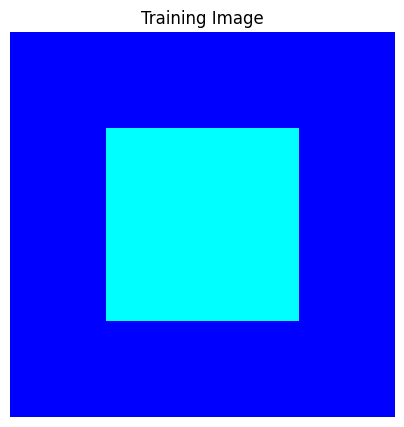

In [5]:
data = torch.zeros((BATCH_SIZE, 3, IMG_SIZE, IMG_SIZE))
data[:, 2, :, :] = 1.0
data[:, 1, 8:24, 8:24] = 1.0

data_np = np.transpose(data[0,:,:,:].detach().numpy(), (1, 2, 0))
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(data_np)
axes.axis('off')
axes.set_title(f"Training Image")
plt.show()

We now initialize and train the model. Note that the code takes 108 minutes to run, so we'll load a saved instance instead.

In [ ]:
dataset = torch.utils.data.TensorDataset(data)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

model = SimpleUNet().to(DEVICE)
diffusion = Diffusion(timesteps=TIMESTEPS, device=DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

train(model, diffusion, data_loader, optimizer, epochs=EPOCHS, device=DEVICE)

torch.save(model.state_dict(), "model/model.pth")

Epoch 500/500: 100%|██████████| 1/1 [00:12<00:00, 12.68s/it, loss=0.048]


Sampling from the trained model

Sampling: 100%|██████████| 1000/1000 [03:01<00:00,  5.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


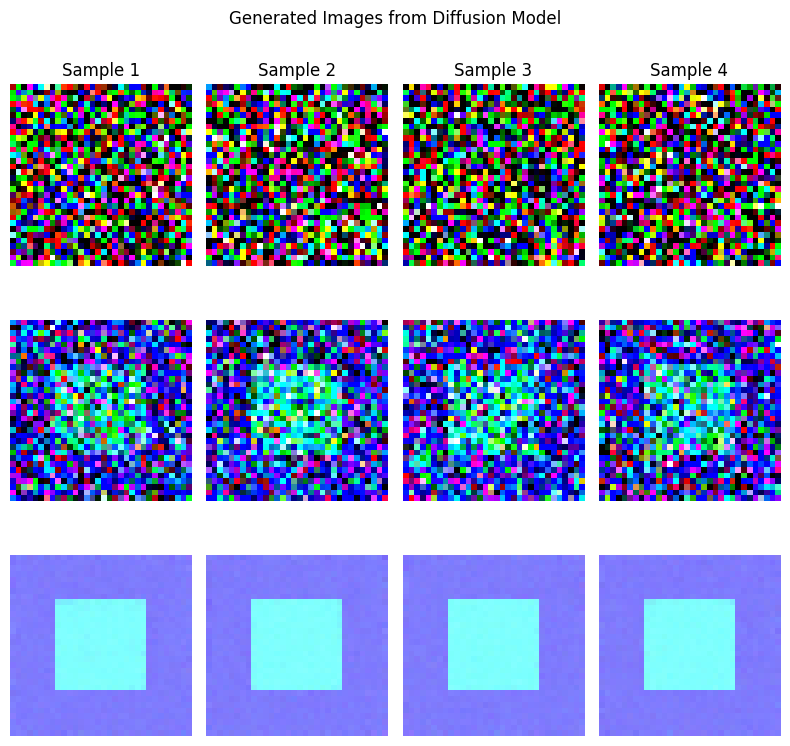

In [35]:
generated_images, intermediate_images = sample(model, diffusion, n_images=4, img_size=IMG_SIZE)

generated_images = (generated_images.clamp(-1, 1) + 1) / 2

fig, axes = plt.subplots(3, 4, figsize=(8, 8))
for i in range(len(generated_images)):
    init1 = np.transpose(intermediate_images[0][i,:,:,:], (1, 2, 0))
    init2 = np.transpose(intermediate_images[15][i,:,:,:], (1, 2, 0))
    img = np.transpose(generated_images[i,:,:,:].numpy(), (1, 2, 0))
    
    axes[0, i].imshow(init1)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Sample {i+1}")

    axes[1, i].imshow(init2)
    axes[1, i].axis('off')
    
    axes[2, i].imshow(img)
    axes[2, i].axis('off')
    
plt.suptitle("Generated Images from Diffusion Model")
plt.tight_layout()
plt.show()